<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/COVID_19_%D0%B4%D0%B5%D1%82%D0%B5%D0%BA%D1%82%D0%BE%D1%80_%D0%BB%D0%B8%D1%86%D0%B5%D0%B2%D0%BE%D0%B9_%D0%BC%D0%B0%D1%81%D0%BA%D0%B8_%D1%81_OpenCV%2C_Keras_TensorFlow_%D0%B8_%D0%B3%D0%BB%D1%83%D0%B1%D0%BE%D0%BA%D0%B8%D0%BC_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19: детектор лицевой маски с OpenCV, Keras / TensorFlow и глубоким обучением

# COVID-19: face mask detector with OpenCV, Keras / TensorFlow and deep learning


В этом уроке вы узнаете, как обучить детектор маски лица COVID-19 с помощью OpenCV, Keras / TensorFlow и глубокого обучения.

In this tutorial, you will learn how to train a COVID-19 face mask detector using OpenCV, Keras / TensorFlow, and deep learning.

Мы рассмотрим датасет, который будем использовать для обучения нашего пользовательского детектора лицевой маски.

Затем реализуем Python-код для обучения детектора маски на нашем датасете с помощью Keras и TensorFlow.

We will look at the dataset that we will use to train our custom face mask detector.

Then we implement Python code to train the mask detector on our dataset using Keras and TensorFlow.



Учитывая обученный детектор маски COVID-19, мы приступим к реализации еще двух дополнительных Python-кодов, используемых для:


Given the trained COVID-19 mask detector, we will proceed to implement two more additional Python codes used to:


* Обнаружения лицевых масок от COVID-19 на изображениях. Detection of COVID-19 face masks in images
* Обнаружения лицевых масок в видеопотоках в реальном времени. Detection of face masks in video streams in real time



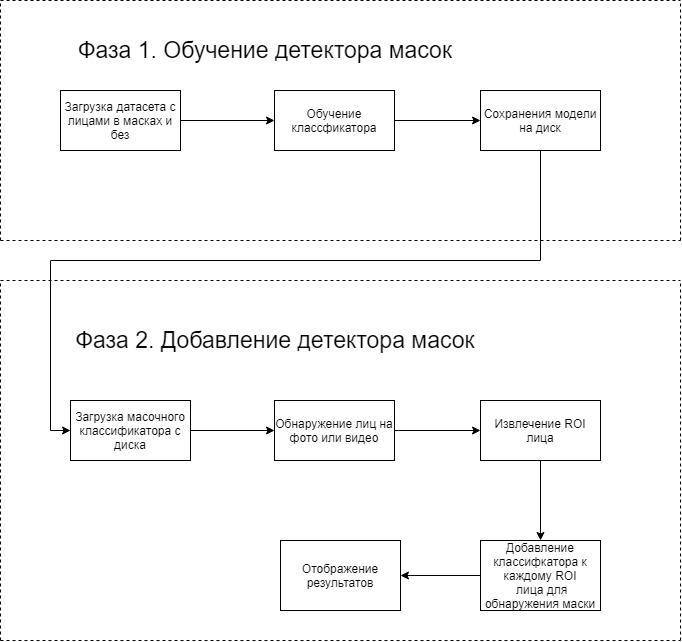

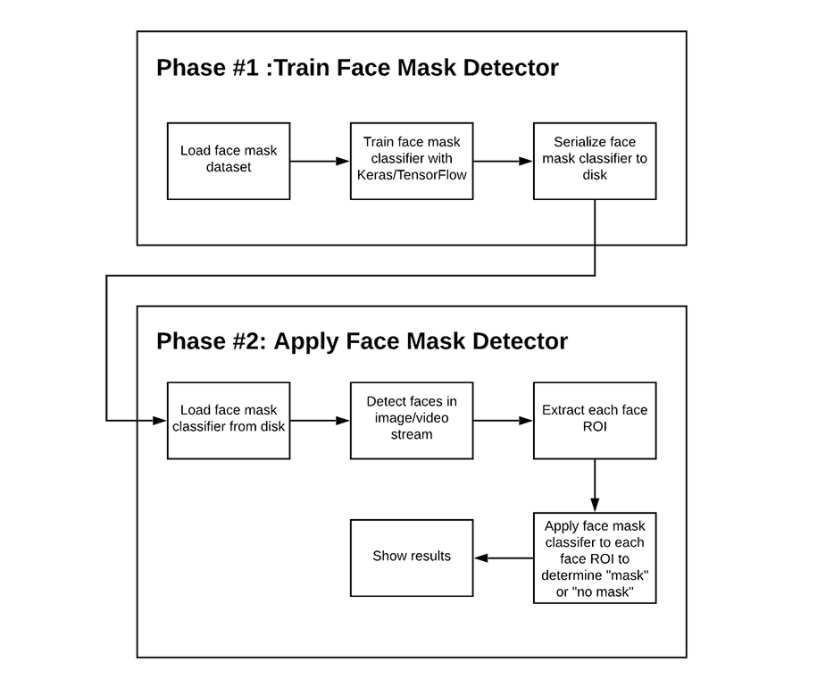

Рисунок 1. - Этапы создания детектора маски COVID-19 с использованием Python, OpenCV и TensorFlow / Keras.

Figure 1. - Steps to build a COVID-19 mask detector using Python, OpenCV and TensorFlow / Keras.

Чтобы обучить детектор лицевой маски, нам нужно разбить наш проект на две отдельные фазы, каждая со своими собственными соответствующими подэтапами (как показано на рисунке 1 выше):


To train the face mask detector, we need to split our project into two distinct phases, each with its own respective sub-steps (as shown in Figure 1 above):

1. Обучение: здесь мы сосредоточимся на загрузке нашего датасета, обучении модели (с использованием Keras / TensorFlow) на этом наборе данных, а затем сохранении детектора маски лица на диск.  Training: Here we will focus on loading our dataset, training the model (using Keras / TensorFlow) on this dataset, and then saving the face mask detector to disk.
2. Развертывание: после того, как детектор маски лица обучен, мы можем перейти к загрузке детектора маски, выполнению обнаружения лица, а затем классификации каждого лица как с маской или же без маски.  Deployment: After the face mask detector is trained, we can proceed to load the mask detector, perform face detection, and then classify each face as masked or unmasked.



### Установка необходимых библиотек 
### Install the necessary packages

In [1]:
!pip install tensorflow==2.2.0

     |████████████████████████████████| 516.2 MB 4.1 kB/s 
     |████████████████████████████████| 454 kB 54.2 MB/s 
     |████████████████████████████████| 3.0 MB 40.8 MB/s 
     |████████████████████████████████| 2.9 MB 14.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalli

### Загрузка файлов
### Download the code zip file

Возьмем датасет с изображениями из открытого гитхаба https://github.com/prajnasb/observations .
Датасет содержит изображения лиц с людей с масками и без.


Let's take a dataset with images from the open github https://github.com/prajnasb/observations.
The dataset contains images of faces from people with and without masks.

In [2]:
!wget http://dataudt.ru/datasets/cv/Lesson_13.Face_Mask_Detector.zip
!unzip -qq Lesson_13.Face_Mask_Detector.zip
%cd /content/Lesson_13.Face_Mask_Detector/

--2022-02-19 09:00:40--  http://dataudt.ru/datasets/cv/Lesson_13.Face_Mask_Detector.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88817575 (85M) [application/zip]
Saving to: ‘Lesson_13.Face_Mask_Detector.zip’

Lesson_13.Face_Mask 100%[===================>]  84.70M  19.9MB/s    in 4.7s    

2022-02-19 09:00:45 (17.9 MB/s) - ‘Lesson_13.Face_Mask_Detector.zip’ saved [88817575/88817575]

/content/Lesson_13.Face_Mask_Detector


### Импорт библиотек 
### Import Packages

In [3]:
# импортируем необходимые библиотеки
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import imutils
import time
import cv2
import os

### Функция отображения изображений в Jupyter Notebooks и Google Colab
### Function to display images in Jupyter Notebooks and Google Colab

In [4]:
def plt_imshow(title, image):
    # конвертируем изображение из формата BGR в RGB и отображаем его 
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Реализация нашего детектора масок COVID-19 с помощью Keras и TensorFlow 
### Implementing our COVID-19 face mask detector training script with Keras and TensorFlow

In [5]:
def detect_and_predict_mask(frame, faceNet, maskNet):
    # возьмем размеры кадра и затем создаем заготовку из него
	# grab the dimensions of the frame and then construct a blob
	# from it
	(h, w) = frame.shape[:2]
	blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300),
		(104.0, 177.0, 123.0))

	# передаем заготовку сети и находим на ней лицо
	# pass the blob through the network and obtain the face detections
	faceNet.setInput(blob)
	detections = faceNet.forward()

    # создаем списки для лиц, их соответствующих местоположений
	# и прогнозов из нашей сети масок
	# initialize our list of faces, their corresponding locations,
	# and the list of predictions from our face mask network
	faces = []
	locs = []
	preds = []

    # проходим циклом через все обнаружения
	# loop over the detections
	for i in range(0, detections.shape[2]):
        # извлекаем уверенность (т.е. вероятность), связанную с обнаружением
		# extract the confidence (i.e., probability) associated with
		# the detection
		confidence = detections[0, 0, i, 2]

        # отфильтруем слабые обнаружения, убедившись, что их вероятность
		# меньше минимальной
		# filter out weak detections by ensuring the confidence is
		# greater than the minimum confidence
		if confidence > args["confidence"]:
            # вычислим (x, y)-координаты ограничивающей рамки объекта
			# compute the (x, y)-coordinates of the bounding box for
			# the object
			box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
			(startX, startY, endX, endY) = box.astype("int")

            # убеждаемся, что ограничивающие рамки находятся в пределах размеров изображения
			# ensure the bounding boxes fall within the dimensions of
			# the frame
			(startX, startY) = (max(0, startX), max(0, startY))
			(endX, endY) = (min(w - 1, endX), min(h - 1, endY))

            # извлекаем ROI лица, конвертируем его из BGR в RGB
			# упорядочиваем, изменяем размер до 224x224 и предварительно обрабатываем
			# extract the face ROI, convert it from BGR to RGB channel
			# ordering, resize it to 224x224, and preprocess it
			face = frame[startY:endY, startX:endX]
			face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
			face = cv2.resize(face, (224, 224))
			face = img_to_array(face)
			face = preprocess_input(face)

            # добавляем лицо и координаты ограничивающей рамки в соответствующие списки
			# add the face and bounding boxes to their respective
			# lists
			faces.append(face)
			locs.append((startX, startY, endX, endY))

    # делаем предсказания только в том случае, если было обнаружено хотя бы одно лицо
	# only make a predictions if at least one face was detected
	if len(faces) > 0:
        # для более быстрого результата мы сделаем предсказания для *всех*
		# лиц одновременно, а не одно за другим, как в приведенном выше цикле `for`
		# for faster inference we'll make batch predictions on *all*
		# faces at the same time rather than one-by-one predictions
		# in the above `for` loop
		faces = np.array(faces, dtype="float32")
		preds = maskNet.predict(faces, batch_size=32)

    # возвращаем кортеж из двух местоположений лиц и их соответствующих вероятностей
	# return a 2-tuple of the face locations and their corresponding
	# locations
	return (locs, preds)

In [6]:


# явно укажем аргументы необходимые для работы
# dataset - путь к входному набору данных
# plot - путь к выходному графику потерь/точности
# model - путь к выходной модели детектора лицевой маски

# explicitly specify the arguments needed to work
# dataset - path to input dataset
# plot - path to output loss/accuracy plot
# model - path to output face mask detector model

args = {
    "dataset": "dataset",
    "plot": "plot.png",
    "model": "mask_detector.model",

}

In [7]:
# определяем исходный шаг обучения, количество эпох для обучения и размер батча
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [8]:
# возьмем список изображений в каталоге нашего датасета, затем инициализируем
# список данных (т.е. изображений) и изображений классов
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
imagePaths = list(paths.list_images(args["dataset"]))
data = []
labels = []

# перебираем все пути к изображениям
# loop over the image paths
for imagePath in imagePaths:
    # извлекаем метку класса из имени файла
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]

    # загружаем исходное изображение (224x224) и обрабатываем его
	# load the input image (224x224) and preprocess it
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)

    # обновляем списки данных и меток соответственно
	# update the data and labels lists, respectively
	data.append(image)
	labels.append(label)

# преобразовываем данные и метки в массивы NumPy
# convert the data and labels to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

# выполняем one-hot кодирование меток
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

[INFO] loading images...


In [9]:
# разделяем данные на обучающую и тестовую выборки, используя 80%
# данных для обучения и оставшиеся 20% для тестирования
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

# построим генератор изображений для аугментации
# construct the training image generator for data augmentation
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [10]:
# загружаем сеть MobileNetV2, убедившись, что главный слой FC заморожен
# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# построим главную модель, которая будет размещена поверх
# основной модели
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

# помещаем главную модель FC поверх основной модели (она станет
# актуальной моделью, которую мы будем тренировать)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# перебираем все слои основной модели и замораживаем их, чтобы они
# *не* обновлялись во время первого тренировочного процесса
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [11]:
# компилируем нашу модель
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# обучаем главную сеть
# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] compiling model...
[INFO] training head...
Epoch 1/20
34/34 [==============================] - 62s 2s/step - loss: 0.5701 - accuracy: 0.7303 - val_loss: 0.1297 - val_accuracy: 0.9891
Epoch 2/20
34/34 [==============================] - 62s 2s/step - loss: 0.1528 - accuracy: 0.9522 - val_loss: 0.0567 - val_accuracy: 0.9891
Epoch 3/20
34/34 [==============================] - 61s 2s/step - loss: 0.0772 - accuracy: 0.9785 - val_loss: 0.0402 - val_accuracy: 0.9891
Epoch 4/20
34/34 [==============================] - 61s 2s/step - loss: 0.0567 - accuracy: 0.9850 - val_loss: 0.0291 - val_accuracy: 0.9928
Epoch 5/20
34/34 [==============================] - 60s 2s/step - loss: 0.0480 - accuracy: 0.9897 - val_loss: 0.0239 - val_accuracy: 0.9928
Epoch 6/20
34/34 [==============================] - 60s 2s/step - loss: 0.0357 - accuracy: 0.9916 - val_loss: 0.0229 - val_accuracy: 0.9928
Epoch 7/20
34/34 [==============================] - 61s 2s/step - loss: 0.0367 - accuracy: 0.9906 - val_loss: 

[INFO] evaluating network...
              precision    recall  f1-score   support

   with_mask       1.00      0.99      1.00       138
without_mask       0.99      1.00      1.00       138

    accuracy                           1.00       276
   macro avg       1.00      1.00      1.00       276
weighted avg       1.00      1.00      1.00       276

[INFO] saving mask detector model...


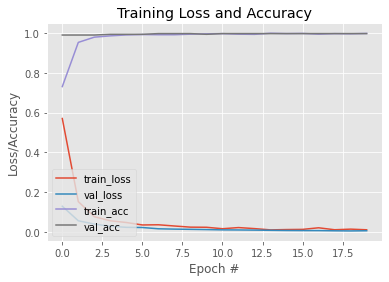

In [12]:
# делаем предсказания на тестовой выборке
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# для каждого изображения в тестовой выборке нам нужно найти индекс
# метки с соответствующей наибольшей предсказанной вероятностью
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# показываем красиво оформленный отчет о классификации
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

# сохраняем модель на диск
# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save(args["model"], save_format="h5")

# построим графики функции потерь и точности
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

### Реализация детектора маски COVID-19 для изображений с помощью OpenCV 
### Implementing our COVID-19 face mask detector for images with OpenCV

In [13]:
# явно укажем аргументы необходимые для работы
# image - путь к входному изображению
# face - путь к каталогу модели детектора лиц
# model - путь к выходной модели детектора маски лица
# confidence - минимальная вероятность для фильтрации слабых обнаружений

# explicitly specify the arguments needed to work
# image - path to input image
# face - path to face detector model directory
# model - path to output face mask detector model
# confidence - minimum probability to filter weak detections

args = {
    "image": "examples/example_01.png",
    "face": "face_detector",
    "model": "mask_detector.model",
    "confidence": 0.5
}

In [14]:
# загружаем нашу сохраненную модель распознавания лиц с диска
# load our serialized face detector model from disk
print("[INFO] loading face detector model...")
prototxtPath = os.path.sep.join([args["face"], "deploy.prototxt"])
weightsPath = os.path.sep.join([args["face"],
	"res10_300x300_ssd_iter_140000.caffemodel"])
net = cv2.dnn.readNet(prototxtPath, weightsPath)

# загружаем нашу сохраненную модель распознавания маск с диска
# load the face mask detector model from disk
print("[INFO] loading face mask detector model...")
model = load_model(args["model"])

[INFO] loading face detector model...
[INFO] loading face mask detector model...


In [15]:
# загружаем нашу сохраненную модель распознавания маск с диска
# load the input image from disk, clone it, and grab the image spatial
# dimensions
image = cv2.imread(args["image"])
orig = image.copy()
(h, w) = image.shape[:2]

# создаем заготовку из изображения
# construct a blob from the image
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),
	(104.0, 177.0, 123.0))

# передаем заготовку сети и находим на ней лицо
# pass the blob through the network and obtain the face detections
print("[INFO] computing face detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing face detections...


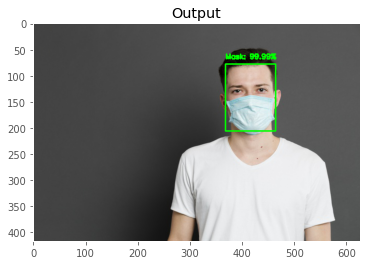

In [16]:
# проходим циклом через все обнаружения
# loop over the detections
for i in range(0, detections.shape[2]):
    # извлекаем уверенность (т.е. вероятность), связанную с обнаружением
	# extract the confidence (i.e., probability) associated with
	# the detection
	confidence = detections[0, 0, i, 2]

    # отфильтруем слабые обнаружения, убедившись, что их вероятность
	# меньше минимальной
	# filter out weak detections by ensuring the confidence is
	# greater than the minimum confidence
	if confidence > args["confidence"]:
        # вычисляем (x, y) - координаты ограничивающего прямоугольника для объекта
		# compute the (x, y)-coordinates of the bounding box for
		# the object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")

        # убеждаемся, что ограничивающие рамки находятся в пределах размеров изображения
		# ensure the bounding boxes fall within the dimensions of
		# the frame
		(startX, startY) = (max(0, startX), max(0, startY))
		(endX, endY) = (min(w - 1, endX), min(h - 1, endY))

        # извлекаем ROI лица, конвертируем его из BGR в RGB
		# упорядочиваем, изменяем размер до 224x224 и предварительно обрабатываем
		# extract the face ROI, convert it from BGR to RGB channel
		# ordering, resize it to 224x224, and preprocess it
		face = image[startY:endY, startX:endX]
		face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
		face = cv2.resize(face, (224, 224))
		face = img_to_array(face)
		face = preprocess_input(face)
		face = np.expand_dims(face, axis=0)

        # пропускаем лицо через модель, чтобы определить,
		# есть маска или нет
		# pass the face through the model to determine if the face
		# has a mask or not
		(mask, withoutMask) = model.predict(face)[0]

        # определяем метку класса, текст и цвет, которые мы будем использовать для рисования
		# ограничивающей рамки
		# determine the class label and color we'll use to draw
		# the bounding box and text
		label = "Mask" if mask > withoutMask else "No Mask"
		color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

        # добавляем вероятность в метку
		# include the probability in the label
		label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

        # отображаем метку и прямоугольник ограничивающей рамки на выходном изображении
		# display the label and bounding box rectangle on the output
		# frame
		cv2.putText(image, label, (startX, startY - 10),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
		cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)

# показываем выходное изображение
# show the output image
plt_imshow("Output", image)

### Реализация детектора маски COVID-19 в реальном времени с помощью OpenCV
###  Implementing our COVID-19 face mask detector in real-time video streams with OpenCV

In [17]:
def detect_and_predict_mask(frame, faceNet, maskNet):
    # возьмем размеры кадра и затем создаем заготовку из него
	# grab the dimensions of the frame and then construct a blob
	# from it
	(h, w) = frame.shape[:2]
	blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300),
		(104.0, 177.0, 123.0))

    # передаем заготовку сети и находим на ней лицо
	# pass the blob through the network and obtain the face detections
	faceNet.setInput(blob)
	detections = faceNet.forward()

    # создаем списки для лиц, их соответствующих местоположений
	# и прогнозов из нашей сети масок
	# initialize our list of faces, their corresponding locations,
	# and the list of predictions from our face mask network
	faces = []
	locs = []
	preds = []

    # проходим циклом через все обнаружения
	# loop over the detections
	for i in range(0, detections.shape[2]):
        # извлекаем уверенность (т.е. вероятность), связанную с обнаружением
		# extract the confidence (i.e., probability) associated with
		# the detection
		confidence = detections[0, 0, i, 2]

        # отфильтруем слабые обнаружения, убедившись, что их вероятность
		# меньше минимальной
		# filter out weak detections by ensuring the confidence is
		# greater than the minimum confidence
		if confidence > args["confidence"]:
            # вычисляем (x, y) - координаты ограничивающего прямоугольника для объекта
			# compute the (x, y)-coordinates of the bounding box for
			# the object
			box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
			(startX, startY, endX, endY) = box.astype("int")

            # убеждаемся, что ограничивающие рамки находятся в пределах размеров изображения
			# ensure the bounding boxes fall within the dimensions of
			# the frame
			(startX, startY) = (max(0, startX), max(0, startY))
			(endX, endY) = (min(w - 1, endX), min(h - 1, endY))

            # извлекаем ROI лица, конвертируем его из BGR в RGB
			# упорядочиваем, изменяем размер до 224x224 и предварительно обрабатываем
			# extract the face ROI, convert it from BGR to RGB channel
			# ordering, resize it to 224x224, and preprocess it
			face = frame[startY:endY, startX:endX]
			face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
			face = cv2.resize(face, (224, 224))
			face = img_to_array(face)
			face = preprocess_input(face)

            # добавляем лицо и координаты ограничивающей рамки в соответствующие списки
			# add the face and bounding boxes to their respective
			# lists
			faces.append(face)
			locs.append((startX, startY, endX, endY))

    # делаем предсказания только в том случае, если было обнаружено хотя бы одно лицо
	# only make a predictions if at least one face was detected
	if len(faces) > 0:
        # для более быстрого результата мы сделаем предсказания для *всех*
		# лиц одновременно, а не одно за другим, как в приведенном выше цикле `for`
		# for faster inference we'll make batch predictions on *all*
		# faces at the same time rather than one-by-one predictions
		# in the above `for` loop
		faces = np.array(faces, dtype="float32")
		preds = maskNet.predict(faces, batch_size=32)

    # возвращаем кортеж из двух местоположений лиц и их соответствующих вероятностей
	# return a 2-tuple of the face locations and their corresponding
	# locations
	return (locs, preds)

In [18]:
# явно укажем аргументы необходимые для работы
# input - входное видео 
# output - выходное видео 
# face - путь к каталогу модели детектора маски лица
# model - путь к выходной модели детектора маски лица
# confidence - минимальная вероятность для фильтрации слабых обнаружений

# explicitly specify the arguments needed to work
# input - input video 
# output - output video 
# face - path to face detector model directory
# model - path to output face mask detector model
# confidence - minimum probability to filter weak detections
args = {
    "input": "Facemask_detection.mp4",
    "output": "output.avi",
    "face": "face_detector",
    "model": "mask_detector.model",
    "confidence": 0.5
}

In [19]:
# загружаем нашу сохраненную модель распознавания лиц с диска
# load our serialized face detector model from disk
print("[INFO] loading face detector model...")
prototxtPath = os.path.sep.join([args["face"], "deploy.prototxt"])
weightsPath = os.path.sep.join([args["face"],
	"res10_300x300_ssd_iter_140000.caffemodel"])
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)

# загружаем нашу сохраненную модель распознавания маск с диска
# load the face mask detector model from disk
print("[INFO] loading face mask detector model...")
maskNet = load_model(args["model"])

# инициализируем указатель на выходной видеофайл
# grab a reference to the video file and initialize pointer to output
# video file
print("[INFO] opening video file...")
vs = cv2.VideoCapture(args["input"])
writer = None

[INFO] loading face detector model...
[INFO] loading face mask detector model...
[INFO] opening video file...


In [20]:
# перебираем все кадры из видеострима
# loop over the frames from the video stream
while True:
    # захватываем следующий кадр
    # grab the next frame
	frame = vs.read()[1]

    # если мы  не захватили кадр, то мы достигли конца видео
	# if we did not grab a frame then we have reached the end of the
	# video
	if frame is None:
		break

    # изменим размер кадра на максимальную ширину 400 пикселей
	# resize the frame to have a maximum width of 400 pixels
	frame = imutils.resize(frame, width=400)
 
    # обнаруживаем лица в кадре и определяем, надета ли на него маска или нет
	# detect faces in the frame and determine if they are wearing a
	# face mask or not
	(locs, preds) = detect_and_predict_mask(frame, faceNet, maskNet)
 
    # перебираем обнаруженные местоположения лиц и их соответствующие вероятности
    # loop over the detected face locations and their corresponding
	# locations
	for (box, pred) in zip(locs, preds):
        # распаковываем ограничивающую рамку и предсказания
		# unpack the bounding box and predictions
		(startX, startY, endX, endY) = box
		(mask, withoutMask) = pred

        # определяем метку класса, текст и цвет, которые мы будем использовать для рисования
		# ограничивающей рамки
		# determine the class label and color we'll use to draw
		# the bounding box and text
		label = "Mask" if mask > withoutMask else "No Mask"
		color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
  
        # добавляем вероятность в метку
		# include the probability in the label
		label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
  
        # отображаем метку и прямоугольник ограничивающей рамки на выходном изображении
		# display the label and bounding box rectangle on the output
		# frame
		cv2.putText(frame, label, (startX, startY - 10),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
		cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)
  
    # если камеры нет и нам нужно записать выходное видео на диск,
    # то инициализируем камеру
    # if the video writer is None *AND* we are supposed to write
	# the output video to disk initialize the writer
	if writer is None and args["output"] is not None:
		fourcc = cv2.VideoWriter_fourcc(*"MJPG")
		writer = cv2.VideoWriter(args["output"], fourcc, 20,
			(frame.shape[1], frame.shape[0]), True)
  
    # если камера есть, то записываем кадр на диск
	# if the writer is not None, write the frame to disk
	if writer is not None:
		writer.write(frame)

# очищаем все данные
# do a bit of cleanup
vs.release()

# проверяем, нужно ли очистить кэш камеры
# check to see if the video writer point needs to be released
if writer is not None:
	writer.release()

Обработка видеофайла займет какое-то время.

Наше выходное видео создается в формате .avi. Нам нужно преобразовать его в формат .mp4.


It will take some time to process the video file.

Our output video is created in .avi format. We need to convert it to .mp4 format.

In [21]:
!ffmpeg -i output.avi output.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [22]:

#@title Воспроизводим выходное видео
#@title Display video inline

from IPython.display import HTML
from base64 import b64encode

mp4 = open("output.mp4", "rb").read()
dataURL = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % dataURL)